In [44]:
%matplotlib inline
from astropy.io import fits, ascii
from astropy.table import Table
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# CIV, OIII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=170.136685524))
('tau-weighted centroid in km/s = ', 137.72514893625055)


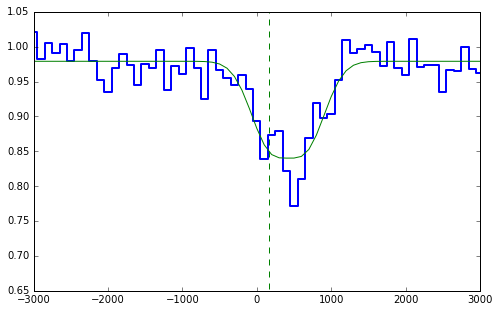

In [45]:
CIV_stack = fits.open('Output/QPQ9_zOIII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*(g_1548_init*g_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#model_init.amplitude_2.bounds = [0.072,0.15]
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
# for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CIV_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_mean_fit.dat')

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=197.372818898))
('tau-weighted centroid in km/s = ', 362.63477610416635)


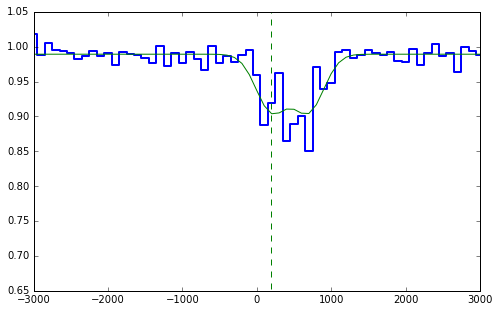

In [46]:
CIV_stack = fits.open('Output/QPQ9_zOIII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=243.,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=243.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*(g_1548_init*g_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#model_init.amplitude_2.bounds = [0.01,0.069]
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
# for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CIV_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_OIII_median_fit.dat')

# CIV, MgII stack

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=54.744960531))
('tau-weighted centroid in km/s = ', 193.76675782042773)


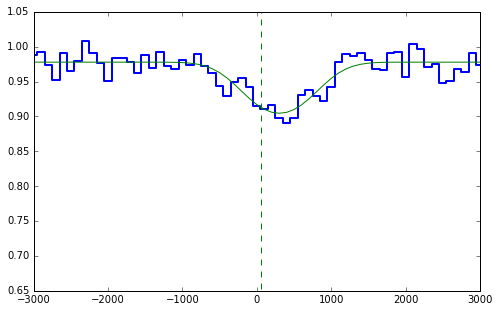

In [47]:
CIV_stack = fits.open('Output/QPQ9_zIRMgII_1548_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=300.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=300.)
c_init = models.Const1D(amplitude=0.97)
model_init = c_init*(g_1548_init*g_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#model_init.amplitude_2.bounds = [0.046/2,0.046]
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CIV_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_mean_fit.dat')

('Centroid velocity in km/s = ', Parameter('mean_1', value=155.372096499))
('tau-weighted centroid in km/s = ', 390.8597953408152)


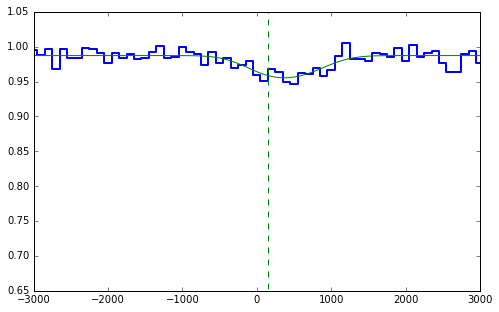

In [48]:
CIV_stack = fits.open('Output/QPQ9_zIRMgII_1548_med.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_1548_init = models.GaussianAbsorption1D(amplitude=0.1,mean=100,stddev=235.)
g_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=100.+498.,stddev=235.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*(g_1548_init*g_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.02/2,0.02]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CIV_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CIV_MgII_median_fit.dat')

# CII, OIII stack

In [49]:
# Try what should conti be. Turns out it doesn't matter if I estimate it first or use this as a free parameter. 
# Except if I want to report dispersion in the average absorption. 
# Changing the continuum level changes what pixels to be set to zero. 
CII_stack = fits.open('Output/QPQ9_zIRMgII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
cranges = [(-3000.,-1300.)*u.km/u.s,(1300.,3000.)*u.km/u.s]
pix = np.where( (velo >= cranges[0][0]) & (velo <= cranges[0][1]) | (velo >= cranges[1][0]) & (velo <= cranges[1][1]))[0]
fit = np.polyfit(velo[pix].value, CII_stack[0].data[pix], 0)
pv = np.poly1d(fit)
conti = pv(velo.value)
conti

array([ 0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905,  0.96935905,  0.96935905,  0.96935905,  0.96935905,
        0.96935905])

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=207.234638353))
('Error in centroid and dispersion = ', 30.726950198594945, 32.945735005569212)
('tau-weighted centroid in km/s = ', 229.93800082678843)


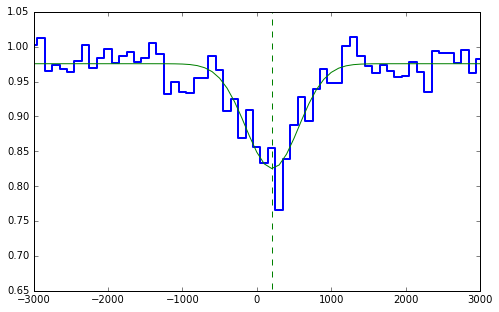

In [50]:
CII_stack = fits.open('Output/QPQ9_zOIII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.9834)
#c_init.amplitude.fixed=True
model_init = c_init*(g_init)
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_mean_fit.dat')

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=60.381926875))
('Error in centroid and dispersion = ', 48.154690915767773, 51.007814313104966)
('tau-weighted centroid in km/s = ', 138.76356853727805)


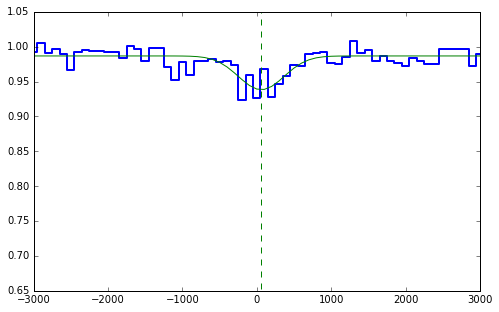

In [51]:
CII_stack = fits.open('Output/QPQ9_zOIII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.9834)
#c_init.amplitude.fixed=True
model_init = c_init*(g_init)
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
# tau-weighted centroid
tau = np.log(1./(CII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_OIII_median_fit.dat')

# CII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=169.669563041))
('Error in centroid and dispersion = ', 35.108459683246949, 37.984729592212943)
('tau-weighted centroid in km/s = ', 373.54824969460242)


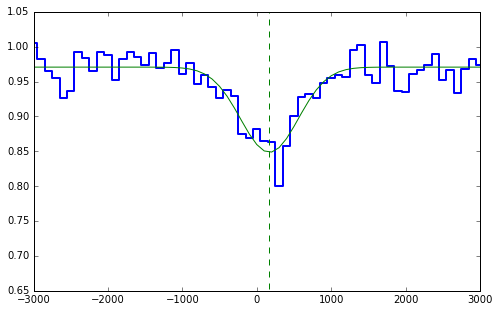

In [52]:
CII_stack = fits.open('Output/QPQ9_zIRMgII_1334_mean.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=140.,stddev=400.)
c_init = models.Const1D(amplitude=0.98)
model_init = c_init*(g_init)
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(CII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_mean_fit.dat')

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=51.0380772779))
('Error in centroid and dispersion = ', 48.250830858207138, 51.185738042702418)
('tau-weighted centroid in km/s = ', 232.60018754698987)


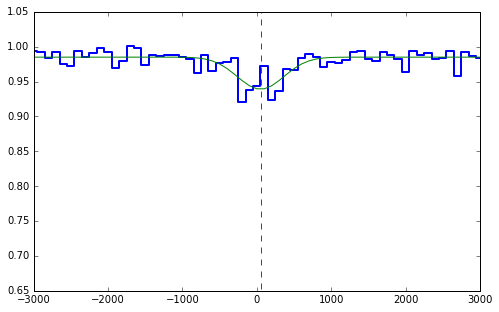

In [53]:
CII_stack = fits.open('Output/QPQ9_zIRMgII_1334_med.fits')
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
velo = (CII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_init = models.GaussianAbsorption1D(amplitude=0.2,mean=257.,stddev=268.)
c_init = models.Const1D(amplitude=0.9834)
model_init = c_init*(g_init)
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(CII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'CII_MgII_median_fit.dat')

# MgII, OIII stack

## Mean stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=288.657113586))
('tau-weighted centroid in km/s = ', 519.08102072579845)


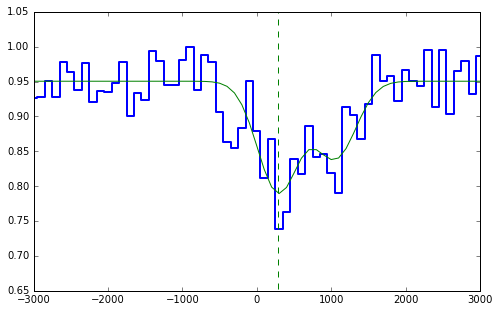

In [54]:
MgII_stack = fits.open('Output/QPQ9_zOIII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=250.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1019.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
#model_init.amplitude_2.bounds = [0.2732/2,0.2732]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_mean_fit.dat')

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=232.858532019))
('tau-weighted centroid in km/s = ', 427.63531848789682)


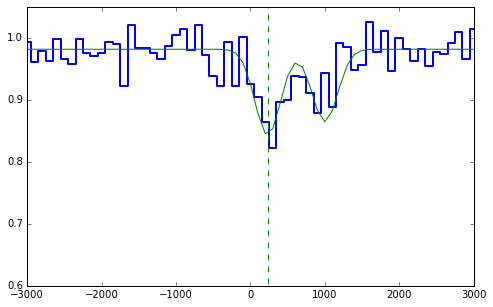

In [55]:
MgII_stack = fits.open('Output/QPQ9_zOIII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=250.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1019.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.2383/2,0.2383]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.6,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_OIII_median_fit.dat')

# MgII, MgII stack 

## Mean stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=158.262277819))
('tau-weighted centroid in km/s = ', 570.62098795205134)


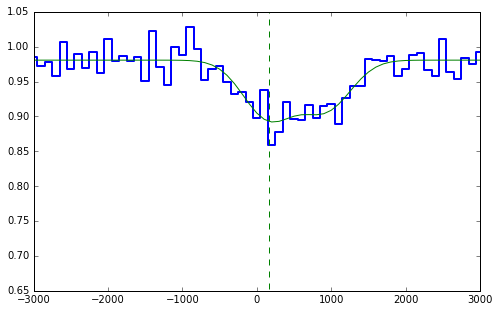

In [56]:
MgII_stack = fits.open('Output/QPQ9_zIRMgII_2796_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=400.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=1169.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
#model_init.amplitude_2.bounds = [0.1700/2,0.1700]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#for some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_mean_fit.dat')

## Median stack

('Centroid velocity in km/s = ', Parameter('mean_1', value=-10.4216885237))
('tau-weighted centroid in km/s = ', 808.7338674841991)


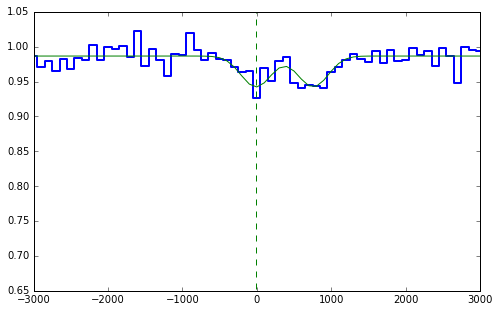

In [68]:
MgII_stack = fits.open('Output/QPQ9_zIRMgII_2796_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=200.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=969.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1*1.
    return amplitude_2
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.tied = tie_amplitude2
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#For some reason this line failed
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_MgII_median_fit.dat')

# MgII at z = 1 stack

## Mean stack  

('Centroid velocity in km/s = ', Parameter('mean_1', value=47.4272159938))
('tau-weighted centroid in km/s = ', -204.47175359620661)


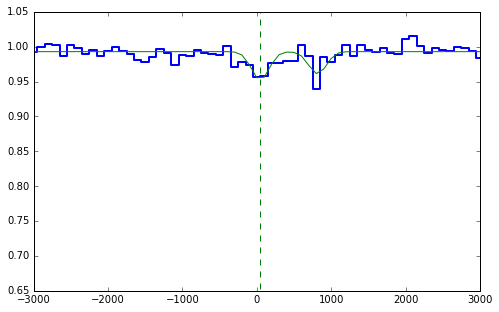

In [58]:
MgII_stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_mean.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.0320/2,0.0320]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_mean_fit.dat')

## Median stack 

('Centroid velocity in km/s = ', Parameter('mean_1', value=14.4883250768))
('tau-weighted centroid in km/s = ', -319.10587728184464)


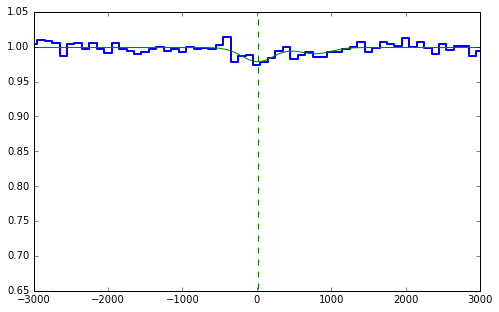

In [59]:
MgII_stack = fits.open('Output/QPQ9_zIRMgII_2796_z1_med.fits')
relativistic_equiv = u.doppler_relativistic(2796.354*u.AA)
velo = (MgII_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g_2796_init = models.GaussianAbsorption1D(amplitude=0.3,mean=0.,stddev=250.)
g_2803_init = models.GaussianAbsorption1D(amplitude=0.15,mean=769.,stddev=250.)
c_init = models.Const1D(amplitude=0.95)
model_init = c_init*(g_2796_init*g_2803_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 769.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
model_init.amplitude_2.bounds = [0.0181/2,0.181]
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,MgII_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, MgII_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.plot([model_final.mean_1.value,model_final.mean_1.value],[0,2],'g--')
plt.axis([-3000,3000,0.65,1.05])
print('Centroid velocity in km/s = ',model_final.mean_1)
#print('Error in centroid and dispersion = ',np.sqrt(fit.fit_info['param_cov'][2][2]),np.sqrt(fit.fit_info['param_cov'][3][3]))
#tau-weighted centroid
tau = np.log(1./(MgII_stack[0].data/model_final.amplitude_0))
start = np.int((len(velo)-1)*1./6.)-1
end = np.int((len(velo)-1)*5./6.)+1
tau_cen = np.sum(velo.value[start:end]*tau[start:end])/np.sum(tau[start:end])
print('tau-weighted centroid in km/s = ',tau_cen)
dict = {}
for ii,pp in enumerate(model_final.parameters):
    dict[model_final.param_names[ii]] = [pp]
ascii.write(Table(dict),'MgII_z1_median_fit.dat')

# CIV foreground quasar stack 

<CompoundModel92(slope_0=1.6216453676836206e-06, intercept_0=0.9835803072187345, amplitude_1=0.028672582135876, mean_1=-2512.039953476008, stddev_1=2079.834165724614, amplitude_2=0.028672582135876, mean_2=-2014.0399534760081, stddev_2=2079.834165724614)>

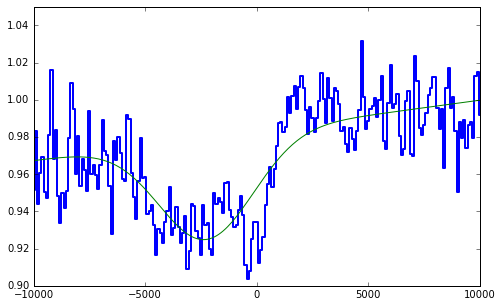

In [60]:
CIV_stack = fits.open('Output/QPQ9_1548_fg_mean.fits')
relativistic_equiv = u.doppler_relativistic(1548.195*u.AA)
velo = (CIV_stack[1].data*u.AA).to(u.km/u.s,equivalencies=relativistic_equiv)
g1_1548_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.,stddev=1000.)
g1_1550_init = models.GaussianAbsorption1D(amplitude=0.05,mean=-4000.+498.,stddev=1000.)
#g2_1548_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.,stddev=500.)
#g2_1550_init = models.GaussianAbsorption1D(amplitude=0.01,mean=-400.+498.,stddev=500.)
l_init = models.Linear1D(intercept=0.97,slope=0.00001)
#model_init = l_init*(g1_1548_init*g1_1550_init)*(g2_1548_init*g2_1550_init)
model_init = l_init*(g1_1548_init*g1_1550_init)
def tie_mean2(model):
    mean_2 = model.mean_1 + 498.
    return mean_2
def tie_stddev2(model):
    stddev_2 = model.stddev_1 
    return stddev_2
def tie_amplitude2(model):
    amplitude_2 = model.amplitude_1
    return amplitude_2
#def tie_mean4(model):
#    mean_4 = model.mean_3 + 498.
#    return mean_4
#def tie_stddev4(model):
#    stddev_4 = model.stddev_3
#    return stddev_4
model_init.mean_2.tied = tie_mean2
model_init.stddev_2.tied = tie_stddev2
model_init.amplitude_2.tied = tie_amplitude2
#model_init.mean_4.tied = tie_mean4
#model_init.stddev_4.tied = tie_stddev4
fit = fitting.LevMarLSQFitter()
model_final = fit(model_init,velo,CIV_stack[0].data)
plt.figure(figsize=(8,5))
plt.plot(velo.value, CIV_stack[0].data,drawstyle='steps-mid',linewidth=2.)
plt.plot(velo.value, model_final(velo.value), label='Gaussian')
plt.axis([-10000,10000,0.90,1.05])
model_final


In [67]:
model = (ascii.read('CII_MgII_mean_fit.dat'))[0]
model

stddev_1,amplitude_1,amplitude_0,mean_1
float64,float64,float64,float64
388.246563734,0.125826504964,0.970693000228,169.669563041
